<a href="https://colab.research.google.com/github/AtharKharal/Data_science_with_python/blob/dev-branch/Hyperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Hyperparameters and Machine Learning

This work primarily clears my workflow for a complete ML pipeline using sklearn in Python.

## Data Loading

In [0]:
from sklearn.datasets import load_iris
iris=load_iris()
X= iris.data
y= iris.target

#Model Instantatiation

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve

In [0]:
model= KNeighborsClassifier(n_neighbors = 2)
scores = cross_val_score(model, X, y, cv=10)


In [4]:
scores.mean()

0.9533333333333334

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [10]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}
gridPolyReg = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
gridPolyReg.fit(X,y);
gridPolyReg.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'linearregression__fit_intercept': True,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 2}

In [22]:
model = gridPolyReg.best_estimator_

y_predicted = model.fit(X, y).predict(X)
y_predicted

array([-1.42342824e-02, -7.58926545e-03, -1.98050989e-02,  4.20298294e-03,
       -3.75105758e-02,  3.34935246e-02, -5.96591736e-02, -4.49974300e-03,
        2.60239261e-02, -1.78523090e-02,  1.72480466e-02, -2.21664479e-02,
       -3.03629998e-02, -5.98244152e-02,  2.58542797e-02,  2.76341872e-02,
        2.25362928e-02,  7.32058400e-03,  6.92285263e-02, -4.10452220e-02,
        2.33480768e-02, -7.94779288e-04, -1.41763356e-01,  1.23616694e-01,
        1.49277224e-02,  9.26391723e-03,  5.38662118e-02,  2.80530050e-03,
       -1.44648602e-02,  4.49900828e-03,  2.58605131e-02,  4.28512088e-02,
       -5.08615999e-02,  1.20774306e-02,  8.55535704e-03, -3.29714804e-02,
       -4.68911424e-02, -6.31977660e-02, -3.67208300e-03,  4.22766079e-04,
       -6.22316092e-03,  1.17384398e-01, -6.63643160e-02,  1.09870732e-01,
       -1.97881841e-02,  5.12565852e-02, -3.37630312e-02, -2.53348681e-02,
        8.85381981e-03, -1.08431890e-02,  9.79743113e-01,  1.12562999e+00,
        1.16053702e+00,  

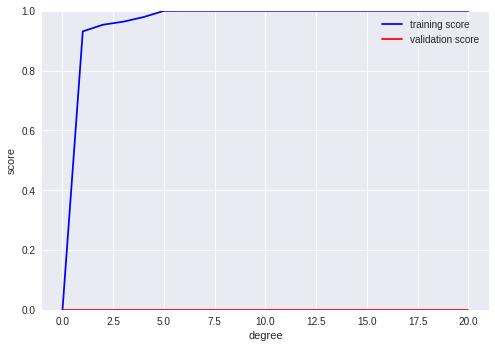

In [25]:
degree = np.arange(0, 21)
train_score, val_score = validation_curve(model, X, y,
                                          'polynomialfeatures__degree', degree,
                                          cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', 
         label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', 
         label='validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');